In [1]:
import pandas as pd
import shutil
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
df = pd.read_csv('HandInfo.csv')
df 

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0
...,...,...,...,...,...,...,...,...,...
11071,1589,22,female,fair,0,0,palmar left,Hand_0011740.jpg,0
11072,1589,22,female,fair,0,0,palmar left,Hand_0011741.jpg,0
11073,1589,22,female,fair,0,0,palmar left,Hand_0011742.jpg,0
11074,1589,22,female,fair,0,0,palmar left,Hand_0011743.jpg,0


In [25]:
# From df, `imageName` and `gender` columns are selected

df = df[["imageName", "gender"]]

# Split the data into training and testing sets

train_df = df.sample(frac=0.65, random_state=0)
test_df = df.drop(train_df.index)

# delete train and test directories if they exist
shutil.rmtree("train", ignore_errors=True)
shutil.rmtree("test", ignore_errors=True)

# Create directories
os.makedirs("train/male", exist_ok=True)
os.makedirs("train/female", exist_ok=True)
os.makedirs("test/male", exist_ok=True)
os.makedirs("test/female", exist_ok=True)

for index, row in train_df.iterrows():
    shutil.copy(
        f'Hands/{row["imageName"]}', f"train/{row['gender']}/{row['imageName']}"
    )

for index, row in test_df.iterrows():
    shutil.copy(f'Hands/{row["imageName"]}', f"test/{row['gender']}/{row['imageName']}")

In [10]:
model = Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Users/ashrock_m13/Developer/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    40,141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 7199 images belonging to 2 classes.
Found 3877 images belonging to 2 classes.


In [30]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator, steps_per_epoch=8)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 8s/step - accuracy: 0.8105 - loss: 0.4237 - val_accuracy: 0.8151 - val_loss: 0.3938
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step - accuracy: 0.8161 - loss: 0.4051 - val_accuracy: 0.8677 - val_loss: 0.3501
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.8748 - loss: 0.3225 - val_accuracy: 0.8852 - val_loss: 0.2887
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.8923 - loss: 0.2824 - val_accuracy: 0.8718 - val_loss: 0.2857
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.9173 - loss: 0.2264 - val_accuracy: 0.9182 - val_loss: 0.2454


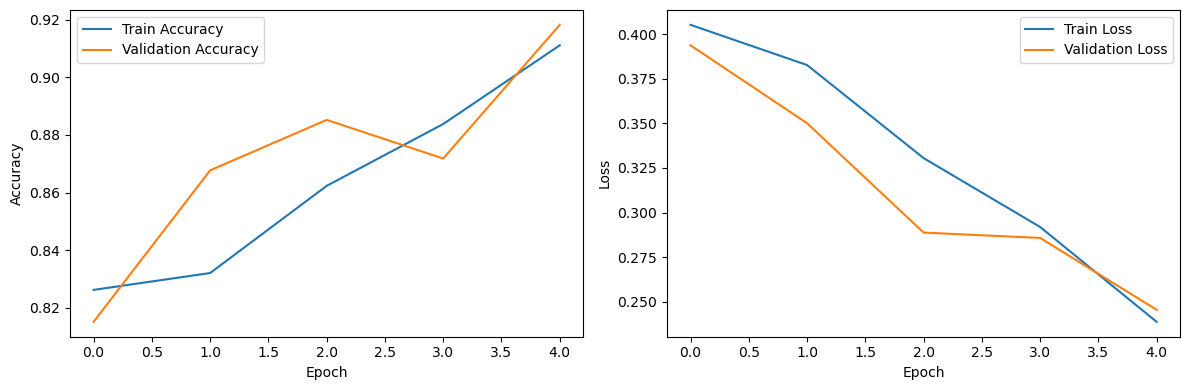

In [31]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)

In [33]:
model.save_weights("predict_gender_from_hand_image.weights.h5")

In [11]:
# Save tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('predict_gender_from_hand_image.weights.tflite', 'wb') as f:
  f.write(tflite_model)

/Users/ashrock_m13/Developer/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
